In [3]:
import os
import numpy as np
import pandas as pd
import json
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

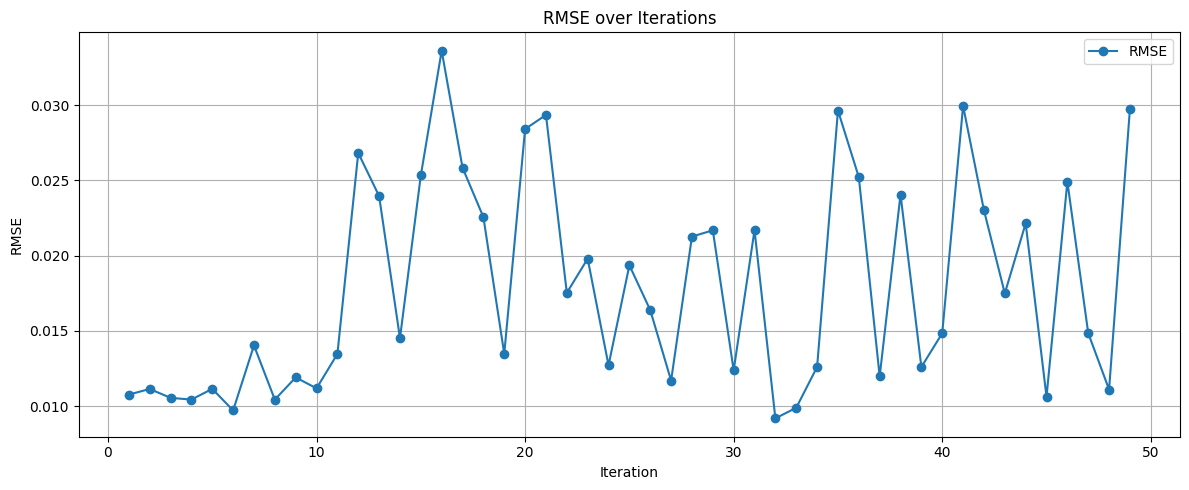

In [11]:
rmses = []
ids = []
for j in range(1,50):    
    s = 0
    for i in range(6):
        path1 = f"results of reviewer-{j}/XJTU results/{i}-{i}/"

        red_label = np.load(path1+"/pred_label.npy")
        true_label = np.load(path1+"/true_label.npy")

        mae = mean_absolute_error(true_label, red_label)
        mape = mean_absolute_percentage_error(true_label, red_label)
        rmse = np.sqrt(mean_squared_error(true_label, red_label))
        s+=rmse
    ids.append(j)
    rmses.append(s/6)

plt.figure(figsize=(12, 5))

plt.plot(ids, rmses, marker='o', label='RMSE')
# plt.yscale('log') 
plt.title('RMSE over Iterations')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
rmses[31]

np.float64(0.009190817022362031)

In [12]:
s = 0
for i in range(6):
    path1 = f"../results of reviewer/XJTU results/{i}-{i}/"

    red_label = np.load(path1+"/pred_label.npy")
    true_label = np.load(path1+"/true_label.npy")

    mae = mean_absolute_error(true_label, red_label)
    mape = mean_absolute_percentage_error(true_label, red_label)
    rmse = np.sqrt(mean_squared_error(true_label, red_label))
    s+=rmse

    print(rmse)
print(s/6)

0.0074301115462879555
0.013787783031161079
0.010506658985990795
0.01160033193598074
0.011848053001350533
0.011619459541201546
0.011132066340328775


In [13]:
s = 0
for i in range(6):
    path1 = f"../results of reviewer/XJTU results/{i}-{i}/"

    red_label = np.load(path1+"/pred_label.npy")
    true_label = np.load(path1+"/true_label.npy")

    mae = mean_absolute_error(true_label, red_label)
    mape = mean_absolute_percentage_error(true_label, red_label)
    rmse = np.sqrt(mean_squared_error(true_label, red_label))
    s+=rmse

    print(rmse)
print(s/6)

0.006302939111209858
0.012713494943457776
0.01252842933118361
0.007672799381077088
0.013068118948051068
0.01021608226798272
0.010416977330493687


In [1]:
import os
import numpy as np
import pandas as pd
import json
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Base directory
base_dir = os.getcwd()
# Initialize a list to hold the data
rows = []

# Iterate over all subdirectories
for idx, directory in enumerate(os.listdir(base_dir)):
    dir_path = os.path.join(base_dir, directory)
    if os.path.isdir(dir_path):
        # Extract parameters from the directory name
        with open(os.path.join(base_dir, directory)+"/XJTU results/0-0/hyper_params.json", "r") as file:
            data = json.load(file)

        # Navigate into 'XJTU results'
        xjtu_results_path = os.path.join(dir_path, 'XJTU results')
        if os.path.isdir(xjtu_results_path):
            # Iterate over batch subdirectories
            for batch_dir in os.listdir(xjtu_results_path):
                spinn_enabled = {"spinn_enabled_" + key: value for key, value in data['spinn_enabled'].items()}
                if spinn_enabled["spinn_enabled_solution_u"]:
                    solution_u_subnet_args = {"solution_u_subnet_args_" + key: value for key, value in data['solution_u_subnet_args'].items()}
                else:
                    solution_u_args = {"solution_u_args_" + key: value for key, value in data['solution_u_args'].items()}
                if spinn_enabled["spinn_enabled_dynamical_F"]:
                    dynamical_F_subnet_args = {"dynamical_F_subnet_args_" + key: value for key, value in data['dynamical_F_subnet_args'].items()}
                else:
                    dynamical_F_args = {"dynamical_F_args_" + key: value for key, value in data['dynamical_F_args'].items()}
                merged_dict = {**spinn_enabled}
                if spinn_enabled["spinn_enabled_solution_u"]:
                    merged_dict.update(solution_u_subnet_args)
                else:
                    merged_dict.update(solution_u_args)
                if spinn_enabled["spinn_enabled_dynamical_F"]:
                    merged_dict.update(dynamical_F_subnet_args)
                else:
                    merged_dict.update(dynamical_F_args)
                merged_dict['model_id'] = directory.split("-")[-1]
                batch_path = os.path.join(xjtu_results_path, batch_dir)
                if os.path.isdir(batch_path):
                    # Extract batch number from the subdirectory name
                    batch = batch_dir

                    # Construct file paths
                    red_label_path = os.path.join(batch_path, 'pred_label.npy')
                    true_label_path = os.path.join(batch_path, 'true_label.npy')
                    num_param_path = os.path.join(batch_path, 'num_param.txt')

                    # Check if the required files exist
                    if os.path.exists(red_label_path) and os.path.exists(true_label_path) and os.path.exists(num_param_path):
                        # Read files
                        red_label = np.load(red_label_path)
                        true_label = np.load(true_label_path)
                        with open(num_param_path, 'r') as f:
                            num_param = int(f.read().strip())
                        

                        # Calculate metrics
                        mae = mean_absolute_error(true_label, red_label)
                        mape = mean_absolute_percentage_error(true_label, red_label)
                        rmse = np.sqrt(mean_squared_error(true_label, red_label))
                        merged_dict['num_params'] = num_param
                        merged_dict['MAE'] = mae
                        merged_dict['MAPE'] = mape
                        merged_dict['RMSE'] = rmse
                        merged_dict['batch'] = batch
                        # Append data
                        rows.append(merged_dict)
                        # print(rows)

for i in range(6):
    path1 = f"../results of reviewer/XJTU results/{i}-{i}/"

    red_label = np.load(path1+"/pred_label.npy")
    true_label = np.load(path1+"/true_label.npy")

    mae = mean_absolute_error(true_label, red_label)
    mape = mean_absolute_percentage_error(true_label, red_label)
    rmse = np.sqrt(mean_squared_error(true_label, red_label))

    data_dict = {key: -1 for key, _ in merged_dict.items()}
    data_dict['batch'] = f"{i}-{i}"
    data_dict['num_params'] = 13662
    data_dict['MAE'] = mae
    data_dict['MAPE'] = mape
    data_dict['RMSE'] = rmse


    rows.append(data_dict)

# Create DataFrame
df = pd.DataFrame(rows)
df.head()

df = df.sort_values(by=['batch', 'RMSE'], ascending=[True, True])

# Display DataFrame
df.to_csv('our-results.csv', index=False)

In [16]:
# Define a function to check if a model wins over the legacy model
def check_win(row, base_row):
    # Compare the metrics: MAE, MAPE, RMSE
    metrics = ['MAE', 'MAPE', 'RMSE']
    wins = sum(row[metric] < base_row[metric] for metric in metrics)
    return wins >= 2

# Group the data by batches
batch_groups = df.groupby('batch')

# List to collect results
results = []

# Iterate over each batch
for batch, group in batch_groups:
    # Get the base model row where dropout == -1
    base_model_row = group[group['dropout'] == -1].squeeze()
    
    # Iterate over other rows within the same batch
    for _, row in group.iterrows():
        if row['dropout'] != -1:
            # Check if the current model wins over the base model
            if check_win(row, base_model_row):
                # Extract hyperparameters and append to results
                hyperparameters = row[['output_dim', 'hidden_dim', 'num_layer', 'dropout', 'num_param']]
                results.append(tuple(hyperparameters))

# Create a DataFrame from the results with a count of wins
summary_df = pd.DataFrame(results, columns=['output_dim', 'hidden_dim', 'num_layer', 'dropout', 'num_param'])
summary_df['win_over_legacy'] = 1
summary_df = summary_df.groupby(['output_dim', 'hidden_dim', 'num_layer', 'dropout', 'num_param']).sum().reset_index()

# Sort the new DataFrame by `win_over_legacy` in descending order
sorted_summary_df = summary_df.sort_values(by='win_over_legacy', ascending=False)

# Display the resulting DataFrame
sorted_summary_df.to_csv("comparison.csv", index=False)

In [2]:
hypers = list(set(df.columns)-set(['batch', 'RMSE', 'MAPE', 'MAE']))

In [3]:
hypers

['dynamical_F_subnet_args_output_dim',
 'dynamical_F_subnet_args_layers_num',
 'solution_u_args_layers_num',
 'dynamical_F_args_hidden_dim',
 'dynamical_F_subnet_args_hidden_dim',
 'spinn_enabled_dynamical_F',
 'model_id',
 'solution_u_args_hidden_dim',
 'dynamical_F_subnet_args_activation',
 'solution_u_subnet_args_hidden_dim',
 'dynamical_F_args_dropout',
 'solution_u_subnet_args_layers_num',
 'dynamical_F_args_layers_num',
 'solution_u_subnet_args_dropout',
 'dynamical_F_subnet_args_dropout',
 'num_params',
 'solution_u_args_dropout',
 'solution_u_subnet_args_activation',
 'spinn_enabled_solution_u',
 'dynamical_F_args_activation',
 'solution_u_args_activation',
 'solution_u_subnet_args_output_dim']

In [4]:
df2 = df.fillna(-1)

In [5]:
df2.columns

Index(['spinn_enabled_solution_u', 'spinn_enabled_dynamical_F',
       'solution_u_subnet_args_output_dim',
       'solution_u_subnet_args_layers_num',
       'solution_u_subnet_args_hidden_dim', 'solution_u_subnet_args_dropout',
       'solution_u_subnet_args_activation',
       'dynamical_F_subnet_args_output_dim',
       'dynamical_F_subnet_args_layers_num',
       'dynamical_F_subnet_args_hidden_dim', 'dynamical_F_subnet_args_dropout',
       'dynamical_F_subnet_args_activation', 'model_id', 'num_params', 'MAE',
       'MAPE', 'RMSE', 'batch', 'solution_u_args_layers_num',
       'solution_u_args_hidden_dim', 'solution_u_args_dropout',
       'solution_u_args_activation', 'dynamical_F_args_layers_num',
       'dynamical_F_args_hidden_dim', 'dynamical_F_args_dropout',
       'dynamical_F_args_activation'],
      dtype='object')

In [6]:
# Group by the specified hyperparameters and calculate the mean of the metrics
grouped_df = df2.groupby(hypers).agg(
    mean_MAE=('MAE', 'mean'),
    mean_MAPE=('MAPE', 'mean'),
    mean_RMSE=('RMSE', 'mean')
).reset_index()

# Sort the new DataFrame by mean_RMSE in ascending order
sorted_df = grouped_df.sort_values(by='mean_RMSE', ascending=True)

# View the resulting DataFrame
sorted_df.to_csv("comparison-2.csv", index=False)

In [7]:
sorted_df.head()

,dynamical_F_subnet_args_output_dim,dynamical_F_subnet_args_layers_num,solution_u_args_layers_num,dynamical_F_args_hidden_dim,dynamical_F_subnet_args_hidden_dim,spinn_enabled_dynamical_F,model_id,solution_u_args_hidden_dim,dynamical_F_subnet_args_activation,solution_u_subnet_args_hidden_dim,...,num_params,solution_u_args_dropout,solution_u_subnet_args_activation,spinn_enabled_solution_u,dynamical_F_args_activation,solution_u_args_activation,solution_u_subnet_args_output_dim,mean_MAE,mean_MAPE,mean_RMSE
176,10.0,5.0,-1.0,-1.0,15.0,True,51,-1.0,leaky-relu,15.0,...,47372,-1.0,leaky-relu,True,-1,-1,10.0,0.006961,0.755074,0.009332
233,15.0,5.0,-1.0,-1.0,23.0,True,81,-1.0,leaky-relu,23.0,...,107276,-1.0,leaky-relu,True,-1,-1,15.0,0.006968,0.756186,0.009459
198,15.0,2.0,-1.0,-1.0,23.0,True,79,-1.0,leaky-relu,23.0,...,49316,-1.0,leaky-relu,True,-1,-1,15.0,0.006986,0.757092,0.009521
212,15.0,3.0,-1.0,-1.0,23.0,True,53,-1.0,leaky-relu,15.0,...,49052,-1.0,leaky-relu,True,-1,-1,10.0,0.007214,0.781480,0.009522
123,5.0,5.0,-1.0,-1.0,8.0,True,48,-1.0,leaky-relu,15.0,...,25217,-1.0,leaky-relu,True,-1,-1,10.0,0.006896,0.749363,0.009531


In [8]:
sorted_df.head(10)

,dynamical_F_subnet_args_output_dim,dynamical_F_subnet_args_layers_num,solution_u_args_layers_num,dynamical_F_args_hidden_dim,dynamical_F_subnet_args_hidden_dim,spinn_enabled_dynamical_F,model_id,solution_u_args_hidden_dim,dynamical_F_subnet_args_activation,solution_u_subnet_args_hidden_dim,...,num_params,solution_u_args_dropout,solution_u_subnet_args_activation,spinn_enabled_solution_u,dynamical_F_args_activation,solution_u_args_activation,solution_u_subnet_args_output_dim,mean_MAE,mean_MAPE,mean_RMSE
176,10.0,5.0,-1.0,-1.0,15.0,True,51,-1.0,leaky-relu,15.0,...,47372,-1.0,leaky-relu,True,-1,-1,10.0,0.006961,0.755074,0.009332
233,15.0,5.0,-1.0,-1.0,23.0,True,81,-1.0,leaky-relu,23.0,...,107276,-1.0,leaky-relu,True,-1,-1,15.0,0.006968,0.756186,0.009459
198,15.0,2.0,-1.0,-1.0,23.0,True,79,-1.0,leaky-relu,23.0,...,49316,-1.0,leaky-relu,True,-1,-1,15.0,0.006986,0.757092,0.009521
212,15.0,3.0,-1.0,-1.0,23.0,True,53,-1.0,leaky-relu,15.0,...,49052,-1.0,leaky-relu,True,-1,-1,10.0,0.007214,0.781480,0.009522
123,5.0,5.0,-1.0,-1.0,8.0,True,48,-1.0,leaky-relu,15.0,...,25217,-1.0,leaky-relu,True,-1,-1,10.0,0.006896,0.749363,0.009531
216,15.0,3.0,-1.0,-1.0,23.0,True,80,-1.0,leaky-relu,23.0,...,68636,-1.0,leaky-relu,True,-1,-1,15.0,0.006963,0.756676,0.009649
60,-1.0,-1.0,-1.0,60.0,-1.0,False,105,-1.0,-1,15.0,...,17708,-1.0,leaky-relu,True,leaky-relu,-1,10.0,0.007062,0.766740,0.009701
119,5.0,5.0,-1.0,-1.0,8.0,True,21,-1.0,leaky-relu,8.0,...,14456,-1.0,leaky-relu,True,-1,-1,5.0,0.007066,0.767897,0.009703
180,10.0,5.0,-1.0,-1.0,15.0,True,78,-1.0,leaky-relu,23.0,...,66956,-1.0,leaky-relu,True,-1,-1,15.0,0.007158,0.778061,0.009757
194,15.0,2.0,-1.0,-1.0,23.0,True,52,-1.0,leaky-relu,15.0,...,29732,-1.0,leaky-relu,True,-1,-1,10.0,0.007179,0.779818,0.009786


In [ ]:
for idx, row in sorted_df.iterrows():
    print(f"model with rank {idx+1} has {row['num_params']} parameters, spinn enabled: [{row['spinn_enabled_solution_u']}, {row['spinn_enabled_dynamical_F']}]")